Mounting the files on google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Train data

Removing the unnecessary features and keeping the relevant features.

Converting Y label strings to numerical value

In [5]:
d = pd.read_csv('/content/drive/MyDrive/EE769Project/glove_sent_encoding_data_12Sent.csv')
d.drop(["Unnamed: 0","Code_blocks","Num_Tags","Body_size","Extra_tags","Code_Lines","Num Tags"], axis=1,inplace=True)
# To convert string to numeric value
new_values = {'HQ':2, 'LQ_EDIT':1, 'LQ_CLOSE':0}
d['Y']  = d.Y.replace(new_values)

Display the data


In [6]:
d.head(10)

,Y,Body_1,Body_2,Body_3,Body_4,Body_5,Body_6,Body_7,Body_8,Body_9,Body_10,Body_11,Body_12,Body_13,Body_14,Body_15,Body_16,Body_17,Body_18,Body_19,Body_20,Body_21,Body_22,Body_23,Body_24,Body_25,Body_26,Body_27,Body_28,Body_29,Body_30,Body_31,Body_32,Body_33,Body_34,Body_35,Body_36,Body_37,Body_38,Body_39,...,Title_261,Title_262,Title_263,Title_264,Title_265,Title_266,Title_267,Title_268,Title_269,Title_270,Title_271,Title_272,Title_273,Title_274,Title_275,Title_276,Title_277,Title_278,Title_279,Title_280,Title_281,Title_282,Title_283,Title_284,Title_285,Title_286,Title_287,Title_288,Title_289,Title_290,Title_291,Title_292,Title_293,Title_294,Title_295,Title_296,Title_297,Title_298,Title_299,Title_300
0,0,-0.240987,0.294838,0.043283,-0.216777,-0.273428,-0.262819,-0.128607,-0.047490,0.206232,-1.043640,0.093642,-0.065293,-0.091981,0.128572,0.199107,-0.104559,-0.101942,0.023553,-0.073419,-0.003258,-0.066790,-0.244832,0.030390,0.191575,0.024952,0.215342,-0.074820,0.043747,0.193661,-0.079593,-0.149580,0.061730,-0.005052,-0.147827,-0.700040,0.165868,-0.046675,-0.265952,-0.267837,...,-0.007578,-0.091531,-0.291598,-0.068264,0.008742,0.005379,-0.058632,-0.246112,0.218130,-0.016450,0.004930,-0.048359,0.124874,0.333840,-0.197837,0.525809,-1.544100,-0.024925,0.062168,0.020237,-0.218701,0.089318,0.091753,-0.120384,-0.108414,-0.028071,-0.230014,-0.023561,-0.042278,-0.110954,-0.168018,0.012100,-0.075568,-0.118220,0.475009,0.345620,-0.062680,-0.013058,-0.346789,-0.184302
1,2,-0.293154,-0.076427,-0.154668,-0.059217,-0.059002,0.278274,-0.014315,0.197191,0.049958,-0.786268,0.266176,0.110769,-0.089363,0.001999,0.111346,0.092343,0.248268,-0.146874,0.039370,-0.013702,0.291454,0.045309,0.145594,0.156029,-0.190869,0.172915,-0.059751,-0.151784,-0.003540,-0.142450,0.088757,0.444503,-0.180326,-0.069164,-0.171736,0.190470,-0.034064,0.038189,0.106640,...,0.117089,-0.152083,-0.164410,-0.106623,-0.178220,0.225706,-0.042528,-0.363157,0.286871,-0.009287,0.068377,0.148473,-0.162717,0.293580,-0.335430,0.194250,-0.129697,0.015882,-0.400536,0.132880,-0.135337,-0.175592,-0.097263,-0.037669,-0.121970,-0.435520,-0.149193,-0.058346,0.081077,-0.402637,-0.092627,-0.062974,0.263365,-0.012204,0.098552,-0.193720,0.380953,-0.360287,0.137164,0.173387
2,2,-0.120708,0.012485,-0.084866,-0.157200,-0.081759,-0.095468,-0.085420,0.155715,0.074075,-0.941932,0.112102,0.024208,0.017980,-0.105131,-0.318010,-0.039927,0.039036,-0.101775,-0.069636,-0.233389,-0.228755,0.103719,0.152153,0.020319,-0.179047,-0.229925,0.011305,0.058682,-0.010918,0.309250,0.156871,-0.047273,0.064185,0.096737,-0.324866,0.256432,-0.119297,-0.374670,-0.026976,...,-0.046861,0.050190,0.062310,0.242104,0.187998,-0.163162,-0.149218,0.090508,0.053851,-0.090001,-0.120537,0.151753,-0.016855,0.134122,-0.248188,0.112005,-0.586151,0.139937,0.233480,0.018990,-0.239051,0.084330,-0.370279,0.097975,0.125676,-0.073724,-0.075676,0.143606,0.113822,0.251213,0.364641,-0.155353,-0.191636,0.023351,0.006381,-0.106198,0.038931,-0.005640,0.000261,-0.132440
3,2,-0.402403,-0.168747,0.150591,-0.276718,0.146649,0.007415,0.016708,-0.432730,-0.137463,-1.579967,0.107133,0.106472,-0.225510,0.363420,0.288383,-0.005712,-0.178427,0.025010,0.140244,0.049824,-0.159559,0.435483,0.082506,0.127247,-0.498813,-0.035577,0.163044,-0.321000,0.053461,-0.260323,0.011077,0.117706,-0.276837,-0.305683,-0.767600,0.174055,-0.040510,-0.146608,-0.086315,...,0.114783,-0.220975,-0.248665,-0.015262,0.086361,0.291582,0.156888,0.208077,0.511552,0.300493,0.168303,-0.403020,-0.118676,-0.073964,0.154756,-0.211824,-0.092012,-0.117538,-0.103871,-0.081810,-0.081461,-0.124442,0.042128,-0.098186,-0.005035,-0.214217,0.212308,-0.169194,0.036502,-0.083160,0.106163,0.324990,-0.018780,-0.346085,0.417951,-0.005268,-0.022219,-0.315493,0.067823,-0.010444
4,2,-0.325340,0.217111,0.267070,-0.306210,-0.158905,-0.164993,0.157609,0.371457,0.197530,-1.630070,0.147243,-0.121327,0.252770,-0.139895,0.139031,0.068265,0.250888,-0.057495,0.096359,-0.246751,0.295695,-0.498655,0.178315,0.360510,-0.0410

Normalising the data using standard scalar

In [7]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() #for data normalization
cols= list(d.columns.values)

scaler.fit(d[cols])
X = pd.DataFrame(scaler.transform(d[cols]))
y = pd.DataFrame(d['Y'])

Importing the test data

In [8]:
td = pd.read_csv('/content/drive/MyDrive/EE769Project/glove_sent_encoding_Testdata_12Sent.csv')
td.drop(["Unnamed: 0","Id","CreationDate","Code_blocks","Num_Tags","Body_size","Extra_tags","Code_Lines","Num Tags"],axis=1,inplace=True)
# To convert string to numeric value
new_values = {'HQ':2, 'LQ_EDIT':1, 'LQ_CLOSE':0}
td['Y']  = td.Y.replace(new_values)

#Normalize test data using the same scaler

cols= list(td.columns.values)
validX = pd.DataFrame(scaler.transform(td[cols]))
validY = pd.DataFrame(td['Y'])

Principal component analysis  for dimensionality reduction to reduce the number of features 

In [9]:
pca5 = PCA(n_components=800)
pca5.fit(X)
X_trans2000_train = pca5.transform(X)
X_trans2000_test = pca5.transform(validX)
exp_vars = pca5.explained_variance_ratio_
#plt.plot(range(1,X.shape[1]+1),exp_vars,'--o')

Text(0.5, 1.0, 'explained variance v/s features')

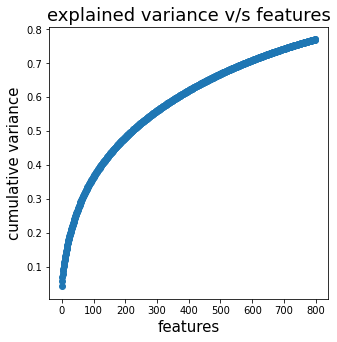

In [14]:
cum_sum = np.cumsum(exp_vars)
plt.figure(figsize=(5,5))
plt.plot(range(len(exp_vars)),cum_sum,'-o')
plt.xlabel('features', fontsize=15)
plt.ylabel('cumulative variance', fontsize=15)
plt.title('explained variance v/s features', fontsize=18)

In [15]:
train_PCA = pd.DataFrame(data=X_trans2000_train)
train_PCA.to_csv('/content/drive/MyDrive/EE769Project/TrainingPCA2000.csv')
train_PCA = pd.DataFrame(data=X_trans2000_test)
train_PCA.to_csv('/content/drive/MyDrive/EE769Project/TestingPCA2000.csv')

In [16]:
exp_var = pd.DataFrame(data=pca5.explained_variance_ratio_)
exp_var.to_csv('/content/drive/MyDrive/EE769Project/TestingPCA2000.csv')

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score # ROC and F1 are balanced metrics

Training **Random Forest Classifier** and tuning it for different hyperparameters

In [ ]:
rfc = RandomForestClassifier()

scoring = 'f1_weighted'

print('Training RFC using GridSearchCV')

hyperparameters = {'max_depth': [10,20,25], 'n_estimators':[50,100,150,200]}

clf = GridSearchCV(rfc, cv=5, param_grid=hyperparameters,  scoring=scoring, verbose=2.1)
clf.fit(np.array(X_trans2000_train), np.squeeze(y))
print('Best parameters:')
print(clf.best_params_)
print('Best' + scoring + ":" + str(clf.best_score_))

print('Train classification report:')
y_true, y_pred = np.squeeze(y), clf.predict(np.array(X_trans2000_train))
print(classification_report(y_true, y_pred))

print('Test classification report:')
y_true, y_pred = np.squeeze(validY), clf.predict(np.array(X_trans2000_test))
print(classification_report(y_true, y_pred))

The best hyperparameters after tuning comes out to be $max\ depth\ as\ 20$ and $n\ estimators\ as\ 200$

In [ ]:
rfc = RandomForestClassifier()

scoring = 'f1_weighted'

print('Training RFC using GridSearchCV')

hyperparameters = {'max_depth': [20], 'n_estimators':[200]}

clf = GridSearchCV(rfc, cv=5, param_grid=hyperparameters,  scoring=scoring, verbose=2.1)
clf.fit(np.array(X_trans2000_train), np.squeeze(y))
print('Best parameters:')
print(clf.best_params_)
print('Best' + scoring + ":" + str(clf.best_score_))

print('Train classification report:')
y_true, y_pred = np.squeeze(y), clf.predict(np.array(X_trans2000_train))
print(classification_report(y_true, y_pred))

print('Test classification report:')
y_true, y_pred = np.squeeze(validY), clf.predict(np.array(X_trans2000_test))
print(classification_report(y_true, y_pred))

Training RFC using GridSearchCV
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=20, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=20, n_estimators=200, score=0.616, total= 5.9min
[CV] max_depth=20, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.9min remaining:    0.0s


[CV] ...... max_depth=20, n_estimators=200, score=0.616, total= 5.8min
[CV] max_depth=20, n_estimators=200 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 11.7min remaining:    0.0s


[CV] ...... max_depth=20, n_estimators=200, score=0.615, total= 6.0min
[CV] max_depth=20, n_estimators=200 ..................................
[CV] ...... max_depth=20, n_estimators=200, score=0.619, total= 6.0min
[CV] max_depth=20, n_estimators=200 ..................................
[CV] ...... max_depth=20, n_estimators=200, score=0.610, total= 6.0min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 29.8min finished


Best parameters:
{'max_depth': 20, 'n_estimators': 200}
Bestf1_weighted:0.6151555387432766
Train classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15000
           1       1.00      1.00      1.00     15000
           2       1.00      1.00      1.00     15000

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000

Test classification report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      5000
           1       0.63      0.50      0.56      5000
           2       0.59      0.80      0.67      5000

    accuracy                           0.62     15000
   macro avg       0.63      0.62      0.62     15000
weighted avg       0.63      0.62      0.62     15000



In [19]:
import numpy as np

Training **Decision Tree Classifier** and tuning it for different hyperparameters

In [ ]:
# Define and fit the classifier on the data

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()


criterion= ['gini', 'entropy']

max_depth= [2,5,10]
                            
parameter_grid = {'criterion': criterion, 'max_depth': max_depth}

##grid search for best parameters
DTC_grid = GridSearchCV(estimator= DTC, param_grid = parameter_grid, cv=3, n_jobs= -1)
DTC_grid.fit(np.array(X_trans2000_train),np.squeeze(y))

print('Best parameters:')
print(DTC_grid.best_params_)
print('Best score' + ":" + str(DTC_grid.best_score_))

print('Train classification report:')
y_true, y_pred = np.squeeze(y), DTC_grid.predict(np.array(X_trans2000_train))
print(classification_report(y_true, y_pred))


print('Test classification report:')
y_true, y_pred = np.squeeze(validY), DTC_grid.predict(np.array(X_trans2000_test))
print(classification_report(y_true, y_pred))

Best parameters:
{'criterion': 'gini', 'max_depth': 5}
Best score:0.4844444444444444
Train classification report:
              precision    recall  f1-score   support

           0       0.45      0.49      0.47     15000
           1       0.55      0.34      0.42     15000
           2       0.52      0.66      0.58     15000

    accuracy                           0.50     45000
   macro avg       0.51      0.50      0.49     45000
weighted avg       0.51      0.50      0.49     45000

Test classification report:
              precision    recall  f1-score   support

           0       0.44      0.49      0.46      5000
           1       0.54      0.34      0.42      5000
           2       0.52      0.66      0.58      5000

    accuracy                           0.49     15000
   macro avg       0.50      0.49      0.49     15000
weighted avg       0.50      0.49      0.49     15000



In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Training **Neural network** by using ReLU and sigmoid activation functions and 10 fold cross validation

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np
# 10-fold cross validation test 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []
# create model
model = Sequential()
model.add(Dense(12, input_dim=800, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
#print(model.fit(X_trans2000_test, validY, epochs=12, batch_size=50))

Epoch 1/12
900/900 [==============================] - 2s 2ms/step - loss: 0.6988 - accuracy: 0.3456 - val_loss: 0.5498 - val_accuracy: 0.4184
Epoch 2/12
900/900 [==============================] - 2s 2ms/step - loss: 0.5332 - accuracy: 0.4375 - val_loss: 0.5321 - val_accuracy: 0.4493
Epoch 3/12
900/900 [==============================] - 2s 2ms/step - loss: 0.5085 - accuracy: 0.4714 - val_loss: 0.5253 - val_accuracy: 0.4651
Epoch 4/12
900/900 [==============================] - 2s 2ms/step - loss: 0.4940 - accuracy: 0.4849 - val_loss: 0.5220 - val_accuracy: 0.4686
Epoch 5/12
900/900 [==============================] - 2s 2ms/step - loss: 0.4827 - accuracy: 0.4959 - val_loss: 0.5188 - val_accuracy: 0.4741
Epoch 6/12
900/900 [==============================] - 2s 2ms/step - loss: 0.4764 - accuracy: 0.5052 - val_loss: 0.5197 - val_accuracy: 0.4764
Epoch 7/12
900/900 [==============================] - 2s 2ms/step - loss: 0.4684 - accuracy: 0.5140 - val_loss: 0.5175 - val_accuracy: 0.4797
Epoch 

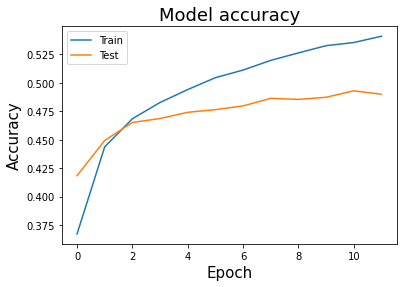

In [24]:
history= model.fit(np.array(X_trans2000_train), np.squeeze(y), validation_data=(X_trans2000_test,validY), epochs=12, batch_size=50)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy',fontsize=18)
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating and plotting the feature importance

In [32]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  rfc = RandomForestClassifier(n_estimators=200)
  rfc.fit(np.array(X_trans2000_train), np.squeeze(y))


  feature_importance=np.array(importance)
  feature_names = np.array(names)
  
  
  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(X_trans2000_train)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [34]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(np.array(X_trans2000_train), np.squeeze(y))
importance = rfc.feature_importances_
print(importance)

[0.00688606 0.00417926 0.00294454 0.00367305 0.00444838 0.00248179
 0.00191673 0.00261568 0.00415758 0.00234158 0.00212497 0.00251251
 0.00536459 0.00665431 0.0019167  0.00219107 0.00377044 0.00614837
 0.00224395 0.00233957 0.00346778 0.0105247  0.00198542 0.00185394
 0.00284987 0.0025392  0.00167844 0.00561059 0.00171784 0.00405411
 0.00153956 0.00259413 0.00162984 0.0041497  0.00431713 0.00197468
 0.00304732 0.00149695 0.00151637 0.00162298 0.001521   0.0016743
 0.00162708 0.0018592  0.00175214 0.00181484 0.00180838 0.00162283
 0.0018392  0.00153994 0.00133322 0.00133939 0.00134353 0.00146572
 0.0017273  0.0020771  0.00189689 0.00197879 0.00125672 0.00159771
 0.00131696 0.00269455 0.00150411 0.00127169 0.00169932 0.00129066
 0.00141342 0.0018651  0.0013259  0.00157732 0.00160798 0.0024091
 0.0013676  0.00162305 0.0014038  0.00152518 0.0015747  0.00133459
 0.00124011 0.00199888 0.00116144 0.00150698 0.00130054 0.00119585
 0.00124147 0.0022025  0.00141298 0.00191943 0.00142514 0.001152

Text(0.5, 1.0, 'feature importance')

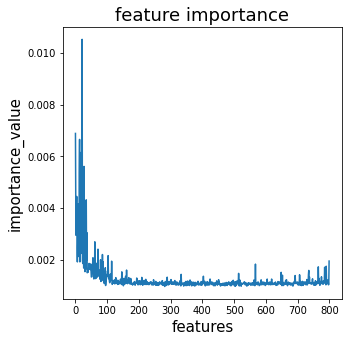

In [38]:
plt.figure(figsize=(5,5))
plt.plot(importance)
plt.xlabel('features', fontsize=15)
plt.ylabel('importance_value', fontsize=15)
plt.title('feature importance', fontsize=18)